In [4]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

character(0)

First, we need to load the necessary packages to ensure we have all the tools required for data manipulation and visualization. Specifically, we will load the "tidyverse" package.

In [9]:
file_path = "/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv"
data <- read.csv(file_path)
head(data)

,Invoice.ID,Branch,City,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax.5.,Total,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
3,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
4,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
5,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
6,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1


In [10]:
summary(data)

  Invoice.ID           Branch              City           Customer.type     
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    Gender          Product.line         Unit.price       Quantity    
 Length:1000        Length:1000        Min.   :10.08   Min.   : 1.00  
 Class :character   Class :character   1st Qu.:32.88   1st Qu.: 3.00  
 Mode  :character   Mode  :character   Median :55.23   Median : 5.00  
                                       Mean   :55.67   Mean   : 5.51  
                                       3rd Qu.:77.94   3rd Qu.: 8.00  
                                   

We will use the "summary(data)" function to obtain basic statistics for each column, making the dataset easier to understand. Since some columns have vague values, such as "Branch" and "City". To find more specific values we will convert categorical coluns to factor using "as.factor" function. Additionally we must check for any missing values using "sum(is.na(data))".

In [15]:
sum(is.na(data))

[1] 0

In [16]:
data$Branch <-as.factor(data$Branch)
data$City<-as.factor(data$City)
data$Customer <-as.factor(data$Customer)
data$Gender <-as.factor(data$Gender)
data$Product.line<-as.factor(data$Product.line)
data$Date <-as.factor(data$Date)
data$Time <-as.factor(data$Time)
data$Payment <-as.factor(data$Payment)

In [17]:
summary(data)

  Invoice.ID        Branch         City     Customer.type         Gender   
 Length:1000        A:340   Mandalay :332   Length:1000        Female:501  
 Class :character   B:332   Naypyitaw:328   Class :character   Male  :499  
 Mode  :character   C:328   Yangon   :340   Mode  :character               
                                                                           
                                                                           
                                                                           
                                                                           
                 Product.line   Unit.price       Quantity         Tax.5.       
 Electronic accessories:170   Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Fashion accessories   :178   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Food and beverages    :174   Median :55.23   Median : 5.00   Median :12.0880  
 Health and beauty     :152   Mean   :55.67   Mean   : 5.51   Mean   :15

We can clearly see the difference in the previous data; it is now more understandable as we can identify the exact numbers for each column.

To obtain descriptive statistics, we need to get basic summary statistics for the columns of interest.

In [21]:
summary(data$Total)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.68  124.42  253.85  322.97  471.35 1042.65 

In [22]:
summary(data$Rating)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   5.500   7.000   6.973   8.500  10.000 

By examining these summary values, I can predict that the graph for "Total" will be postively skewed(right-skewed) because the mean value is higher than the median value. Conversely for "Rating", I expect it to be either negatively skewed or almost symmetric since the mean value is lower than the median value, but the values are quite close. Let's verify this by creating a histogram.

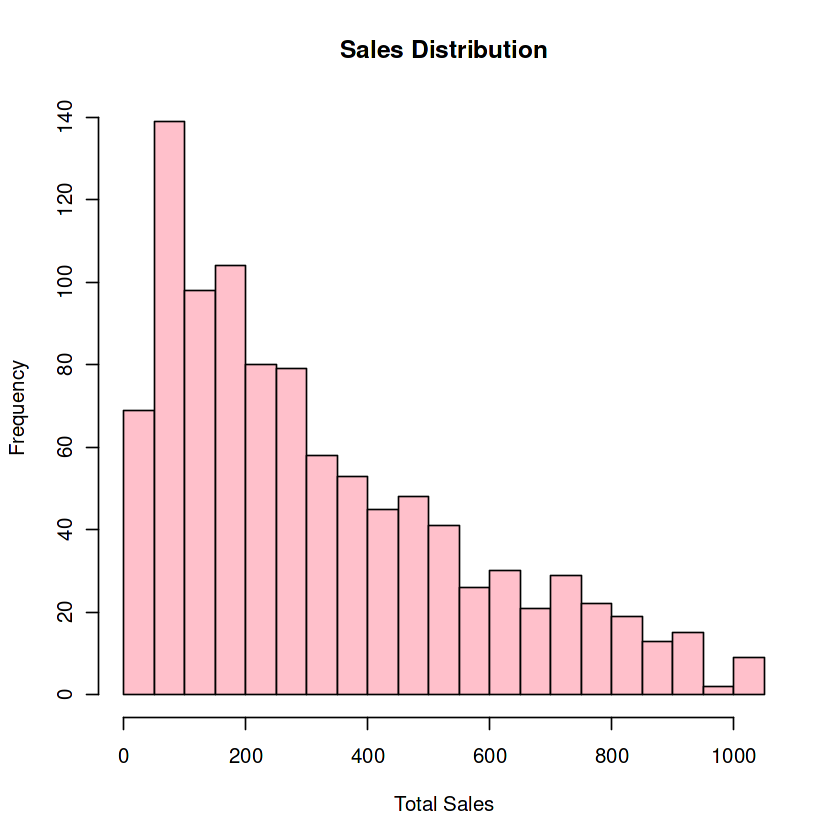

In [23]:
hist(data$Total, breaks=20, col="pink", main="Sales Distribution", xlab= "Total Sales", ylab = "Frequency")

The histogram confirms thtat distribution of total sales is right-skewed, as the mean value is higher than the median value. This indicates that a few higher sales values are pulling the mean upward. This skewness suggests that there could be some large sales outliers or a small number of very high sales transactions affecting the average, with the majority of sales transactions being lower than the mean.

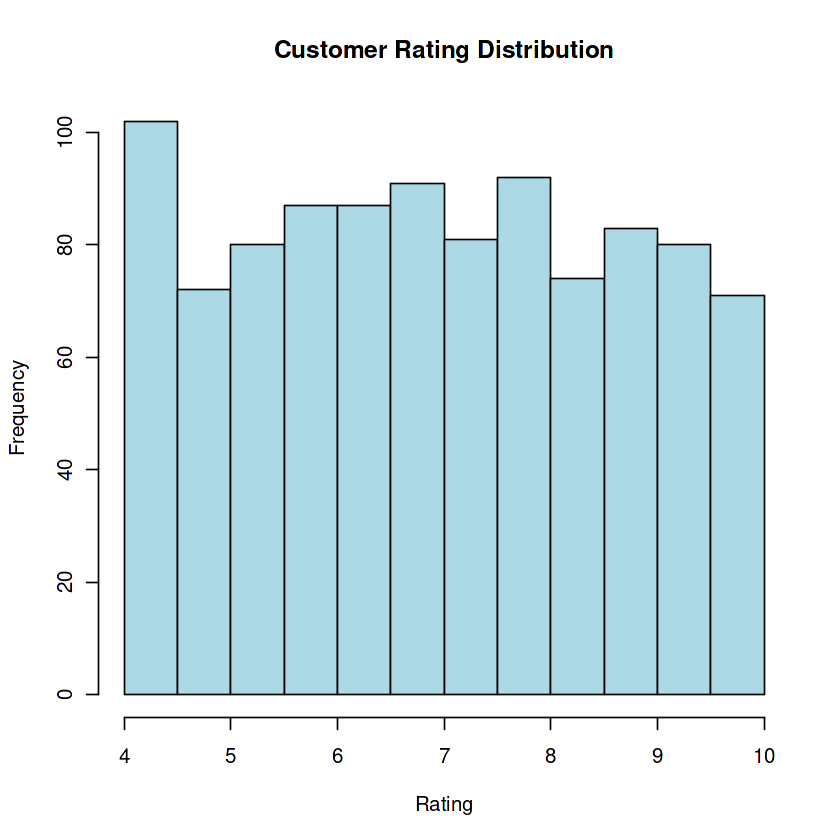

In [24]:
hist(data$Rating, breaks = 20, col ="lightblue", main= "Customer Rating Distribution", xlab="Rating", ylab= "Frequency")

For customer ratings, the mean value is lower by 0.1 than the median value, indicating a slightly left-skewed or nearly symmetrical distribution. This shows that the distribution of customer ratings is fairly balanced, with a slight inclination towards higher ratings. The small difference between the mean and median(0.1) suggests that the ratings are quite evenly distributed without significant outliers.

Now, let's examine both "Total Sales" and "Customer Ratings" together by creating a scatter plot. Visualizing the data helps us understand distributions and spot any anomalies or trends.

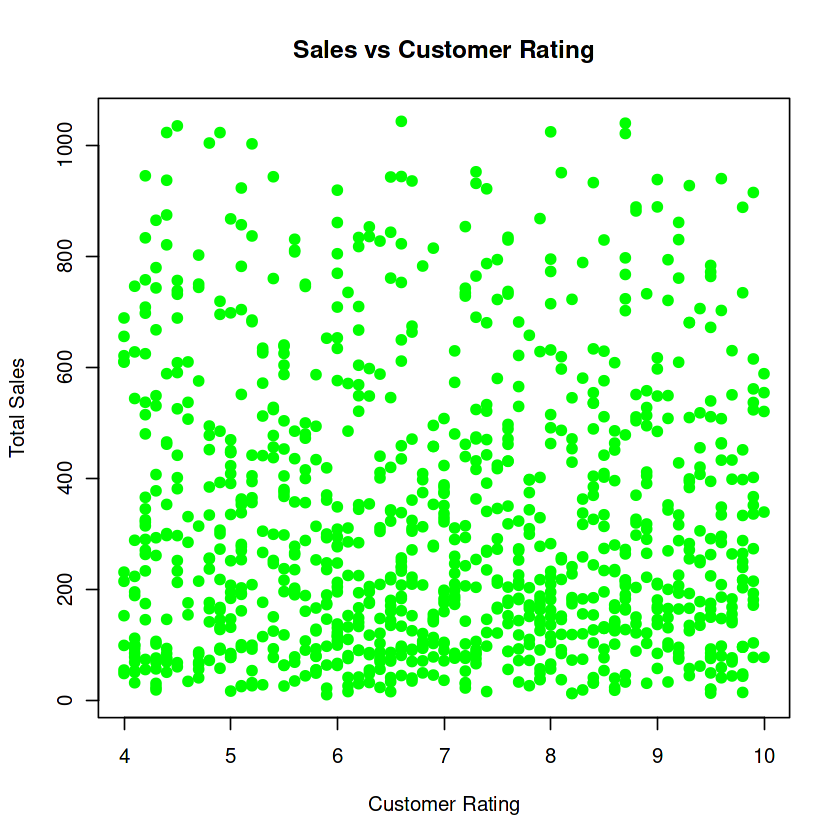

In [25]:
plot(data$Rating, data$Total, main="Sales vs Customer Rating", xlab = "Customer Rating", ylab="Total Sales", pch=19, col="green")

These scatterplot reveals no clear relationships between customer ratings and total sales. The points are scattered across the plot, indicating that ratings do not have a strong positive or negative correlation with sales. No discernible pattern or trend is suggesting that higher ratings correlate with higher sales or vice versa.

To further analyze this, we will conduct a correlation analysis to measure the strength and direction of the linear relationship between sales and customer ratings.

In [26]:
correlation <- cor(data$Total, data$Rating)
print(correlation)

[1] -0.0364417


The correlation analysis shows a negative correlation value, indicating that higher total sales are assoicated with lower customer ratings, and vice versa. This could be due to several reasons. High sales might be drive by aggressive marketing or promotions, which could attract many customers but could lead to dissatisfaction if product or service quality is compromised to meet high demand.

For example, when a company launches a new product with significant marketing, sales might be rise, but due to the rush to meet demand, product quality could suffer, resulting in negative reviews and lower customer ratings. Hence, while sales are high, customer ratings drop, resulting in a negative correlation.

Next, we will perform a regression analysis to model the relationship between customer ratings and sales, helping us understand how one variable affects the other.

In [27]:
model <- lm(Total ~ Rating, data=data)
summary(model)


Call:
lm(formula = Total ~ Rating, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-317.9 -198.6  -67.9  149.8  725.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  359.322     32.502  11.056   <2e-16 ***
Rating        -5.214      4.526  -1.152     0.25    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 245.8 on 998 degrees of freedom
Multiple R-squared:  0.001328,	Adjusted R-squared:  0.0003273 
F-statistic: 1.327 on 1 and 998 DF,  p-value: 0.2496


As these results do not provide clear evidence that customer ratings affect or are related to total sales, I decided to plot the regression line.

Performing a regression analysis helps us determine the magnitude and direction of changes in the response variable when the explanatory variable changes. Since these results do not provide clear evidence that customer ratings affect or are related to total sales, I decided to plot the regression line. Performin a regression analysis helps us identify how much and in what direction the response variable changes when the explanatory variable changes.

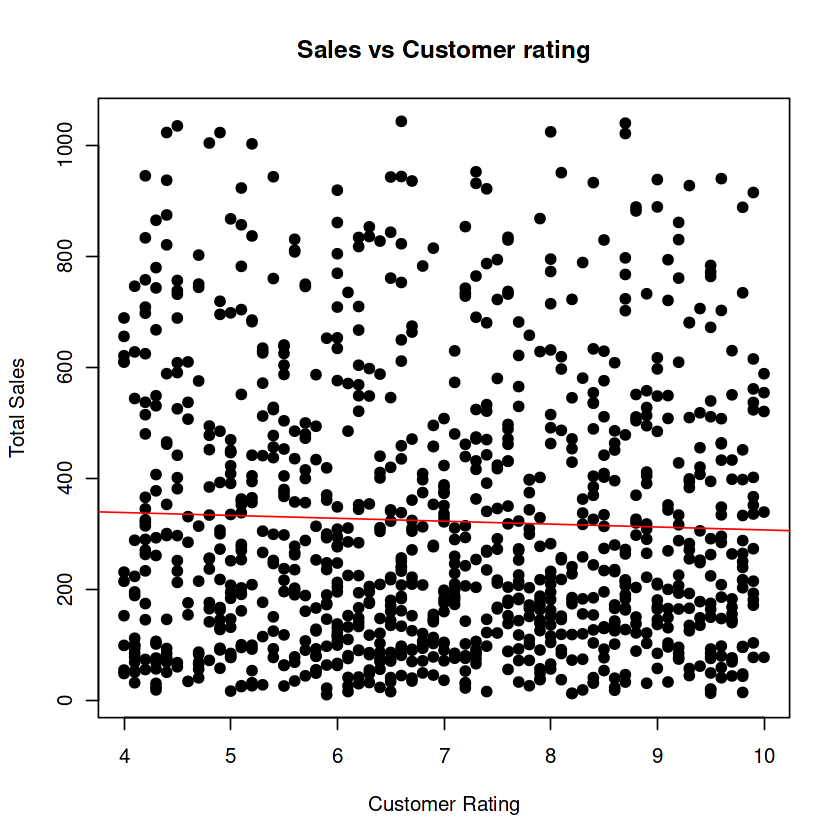

In [33]:
plot(data$Rating, data$Total, main="Sales vs Customer rating", xlab="Customer Rating", ylab="Total Sales", pch = 19, col="black")
abline(lm(Total~Rating, data=data), col="red")

The linear regression results indicate a weak relationship between total sales and customer ratings, closer to no significant relationship. This shows that total sales tend to decrease slightly as customer ratings increase, or vice versa. However, since the relationship is weak, this trend is not very strong or consistent. This small inverse association indicates that customer ratings alone are not a reliable predictor of total sales.

In conclusion, the analysis shows a weak and negative correlation between total sales and customer ratings in the supermarket dataset. This suggests that while there is a small inverse relationship, it is not strong enough to use customer ratings as a reliable predictor of total sales. Further investigation into other factors affecting sales and customer satisfaction might be necessary to understand the dynamics fully.